<a href="https://colab.research.google.com/github/rubincus/OptimizacionPuentes/blob/master/ModeloClasificacionFactibilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd 


In [ ]:
# Esto simplemente lo hacemos para saber el nombre de las tables existentes.
con = sqlite3.connect('G:/Investigación/puentes/No_Factibles/puentes_no_factibles_db2.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('esfuerzos',), ('deformaciones',), ('mediciones_coeficientes',)]


In [ ]:
import os
import pandas as pd 
import sqlite3
"""
Esta función tiene por objetivo leer todos los archivos .db 
y cargarlos en un unico dataframe de pandas. 
Utilizaremos algunas funcionalidades de os y pandas
"""

def read_db_files(path, file_type):

    file_names = [x for x in os.listdir(path) if x.endswith(file_type)]
    state = 0
    for file_name in file_names:
        con = sqlite3.connect(path + file_name)
        if state == 0:
            bridges = pd.read_sql_query("SELECT * from mediciones_coeficientes", con)
            #print(bridges.shape)
            state = 1
        else:
            print(file_name)
            bridges_temp = pd.read_sql_query("SELECT * from mediciones_coeficientes", con)
            #print(bridges_temp.shape)
            # merge
            bridges = pd.concat([bridges, bridges_temp])
    return bridges
            
        

In [ ]:
"""
Los cargamos en datasets distintos. 
Ya que como vamos a entrenar un clasificados vamos a distinguir factibles de no factibles.
Se deben adaptar las rutas para un correcto funcionamiento.
"""

path = 'G:/Investigación/puentes/Factibles/'
file_type = 'db'
bridges = read_db_files(path, file_type)

path = 'G:/Investigación/puentes/No_Factibles/'
bridges_unfactibles = read_db_files(path, file_type)


puentes_aleatorios_db10.db
puentes_aleatorios_db11.db
puentes_aleatorios_db12.db
puentes_aleatorios_db13.db
puentes_aleatorios_db14.db
puentes_aleatorios_db15.db
puentes_aleatorios_db16.db
puentes_aleatorios_db2.db
puentes_aleatorios_db3.db
puentes_aleatorios_db4.db
puentes_aleatorios_db5.db
puentes_aleatorios_db6.db
puentes_aleatorios_db7.db
puentes_aleatorios_db8.db
puentes_aleatorios_db9.db
puentes_no_factibles_db1.db
puentes_no_factibles_db11.db
puentes_no_factibles_db12.db
puentes_no_factibles_db13.db
puentes_no_factibles_db14.db
puentes_no_factibles_db16.db
puentes_no_factibles_db17.db
puentes_no_factibles_db18.db
puentes_no_factibles_db19.db
puentes_no_factibles_db2.db
puentes_no_factibles_db20.db
puentes_no_factibles_db21.db
puentes_no_factibles_db22.db
puentes_no_factibles_db24.db
puentes_no_factibles_db3.db
puentes_no_factibles_db4.db
puentes_no_factibles_db5.db
puentes_no_factibles_db6.db
puentes_no_factibles_db7.db
puentes_no_factibles_db8.db


In [ ]:
# Vemos la catidad de registros para que nuestro dataset no este desbalanceado.
print(bridges_unfactibles.shape)
print(bridges.shape)

(13984, 593)
(20268, 593)


In [ ]:
"""
Para distinguier ambos puentes.
0: Puentes no factibles
1: Puentes factibles.
"""

bridges['fact'] = 1
bridges_unfactibles['fact'] = 0
bridges_consolid = pd.concat([bridges, bridges_unfactibles])
# El tipo debe ser flotante para las visualizaciones posteriores. 
bridges_consolid_filtered = bridges_consolid.iloc[:,1:36].astype(float)
# Concatenamos ambos archivos en un consolidado.
bridges_consolid_filtered = pd.concat([bridges_consolid_filtered,bridges_consolid['fact']], axis =1)
bridges_consolid_filtered.head()

,bsup,alphaw,hc,hb,ds,ef1,bf1,hcs,ecs,ew,...,bfvp,efvp,ewvp,fck,fyk,fsk,fsck,hsc,fisc,fact
0,8.21,65.0,0.28,2.58,0.49,0.027,0.90,0.28,0.021,0.027,...,0.7,0.025,0.032,30.0,355.0,400.0,400.0,175.0,22.0,1
1,7.42,72.0,0.30,2.91,0.60,0.034,0.45,0.43,0.021,0.031,...,0.6,0.033,0.025,25.0,460.0,500.0,400.0,150.0,22.0,1
2,7.66,82.0,0.27,2.78,0.64,0.053,0.91,0.72,0.017,0.050,...,0.5,0.035,0.035,40.0,355.0,500.0,400.0,100.0,22.0,1
3,7.35,59.0,0.20,3.79,0.56,0.051,0.58,0.13,0.018,0.038,...,0.7,0.032,0.034,40.0,355.0,400.0,400.0,150.0,19.0,1
4,9.56,87.0,0.20,2.63,0.54,0.045,0.90,0.77,0.025,0.047,...,0.7,0.027,0.033,25.0,460.0,500.0,400.0,100.0,22.0,1


In [ ]:
# Esto para visualizar pairplots
bridges_consolid_filtered = bridges_consolid.iloc[:,10:15].astype(float)
bridges_consolid_filtered = pd.concat([bridges_consolid_filtered,bridges_consolid['fact']], axis =1)
bridges_consolid_filtered.head()

(27290, 6)

In [ ]:
bridges_consolid_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 428 to 265
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ew      2000 non-null   float64
 1   hci     2000 non-null   float64
 2   eci     2000 non-null   float64
 3   bci     2000 non-null   float64
 4   ef2     2000 non-null   float64
 5   fact    2000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 109.4 KB


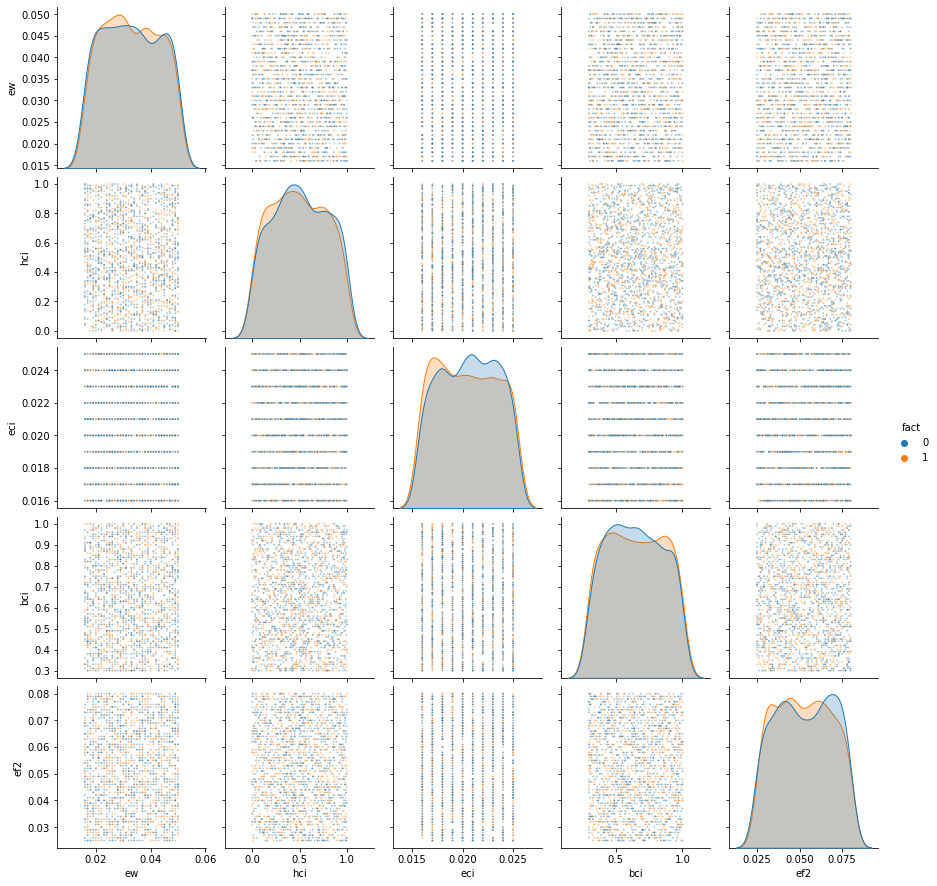

In [ ]:
# Vamos a visualizar 
import matplotlib.pyplot as plt
import seaborn as sns
#plot_kws={"s": 0.1}


#g = sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

%matplotlib inline
sns.pairplot(data=bridges_consolid_filtered, hue='fact',plot_kws={'s': 3, 'alpha': 0.5})
plt.show()

Los pair plots no nos dicen mucho sobre la capacidad de diferenciar del data set. Luego se tendran que considerar relaciones mas complejas ya que las distribuciones son muy similares y la visualización de a pares no es concluyente.

### Ahora vamos a normalizar y separar la data.


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler1 = MinMaxScaler()
X_bridges = bridges_consolid_filtered.iloc[:,0:35]
Y_bridges = bridges_consolid_filtered.iloc[:,35:36]
X_bridges_scaled = scaler.fit_transform(X_bridges)
X_bridges.head()

,bsup,alphaw,hc,hb,ds,ef1,bf1,hcs,ecs,ew,...,d_rigd,bfvp,efvp,ewvp,fck,fyk,fsk,fsck,hsc,fisc
0,8.21,65.0,0.28,2.58,0.49,0.027,0.90,0.28,0.021,0.027,...,5.8,0.7,0.025,0.032,30.0,355.0,400.0,400.0,175.0,22.0
1,7.42,72.0,0.30,2.91,0.60,0.034,0.45,0.43,0.021,0.031,...,7.1,0.6,0.033,0.025,25.0,460.0,500.0,400.0,150.0,22.0
2,7.66,82.0,0.27,2.78,0.64,0.053,0.91,0.72,0.017,0.050,...,6.7,0.5,0.035,0.035,40.0,355.0,500.0,400.0,100.0,22.0
3,7.35,59.0,0.20,3.79,0.56,0.051,0.58,0.13,0.018,0.038,...,6.3,0.7,0.032,0.034,40.0,355.0,400.0,400.0,150.0,19.0
4,9.56,87.0,0.20,2.63,0.54,0.045,0.90,0.77,0.025,0.047,...,6.9,0.7,0.027,0.033,25.0,460.0,500.0,400.0,100.0,22.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bridges_scaled, Y_bridges, test_size=0.33, random_state=32)


### Aquí construimos nuestro modelo

In [ ]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint


In [ ]:
# Incorpore su capa de entrada
input_layer = Input(shape=(35,), dtype='float32')

In [ ]:
# Incorpore capas escondidas
dense1 = Dense(128, activation='relu')(input_layer)
dense2 = Dense(64, activation='relu')(dense1)
dense3 = Dense(32, activation='relu')(dense2)

In [ ]:
# Agregue su dropout
#dropout_layer = Dropout(0.2)(dense3)

In [ ]:
# Ingrese su capa de salida
output_layer = Dense(1, activation='sigmoid')(dense3)

In [ ]:
# Compile su modelo aqui.
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='binary_crossentropy', optimizer='adam')
ts_model.summary()

Model: "functional_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 35)]              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               4608      
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 33        
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:

save_weights_at = os.path.join(path, 'Bridge_MLP_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=128, epochs=30,
             verbose=1, callbacks=[save_best], validation_data=(X_test, y_test),
             shuffle=True)

Epoch 1/30
176/176 [==============================] - 0s 2ms/step - loss: 0.3691 - val_loss: 0.2785
Epoch 2/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2781 - val_loss: 0.2745
Epoch 3/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2707 - val_loss: 0.2704
Epoch 4/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2651 - val_loss: 0.2648
Epoch 5/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2646 - val_loss: 0.2609
Epoch 6/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2581 - val_loss: 0.2671
Epoch 7/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2571 - val_loss: 0.2631
Epoch 8/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2537 - val_loss: 0.2593
Epoch 9/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2513 - val_loss: 0.2582
Epoch 10/30
176/176 [==============================] - 0s 1ms/step - loss: 0.2467 - val_loss: 0.2602

### Verificando los resultados.



In [ ]:
import numpy as np
# Cargamos nuestro modelo. El mejor
path = 'G:/Investigación/puentes/No_Factibles/'

best_model = load_model(os.path.join(path, 'Bridge_MLP_weights.08-0.2593.hdf5'))

preds = best_model.predict(X_test)
preds_class = np.round(preds,0)
# Un caso de ejemplo. 
print(preds_class[2000:2005], y_test[2000:2005])


[[1.]
 [1.]
 [1.]
 [0.]
 [0.]]       fact
1079     1
194      1
787      1
62       0
71       1


In [ ]:
best_model.evaluate(X_test, y_test)

347/347 [==============================] - 0s 385us/step - loss: 0.2593


0.25925201177597046

In [ ]:
pip install more-itertools

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

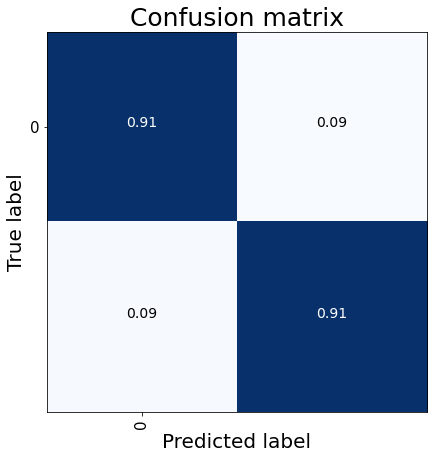

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(preds_class,y_test)

plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, classes=np.unique(np.where(y_test != 0)[1]), title="Confusion matrix")

## Veamos si podemos hacer un modelo mas eficiente

Vamos a entender donde se producen los errores. Vamos a mirar las probabilidades y comparar con los valores reales 1 y 0. Si la mayor cantidad de fallas esta en el rango $[0.3,  0.7]$, podemos dejar que estas sean manuales y todo el resto automático. 

array([[<AxesSubplot:title={'center':'fact'}>]], dtype=object)

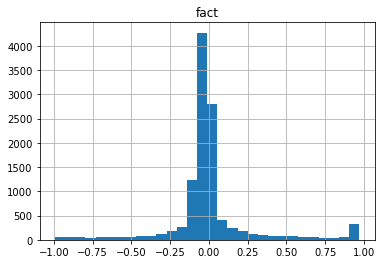

In [ ]:
# No se ve mucha posibilidad de mejorar.
comparison = pd.DataFrame(preds - y_test)
comparison.hist(bins=30)

De acuerdo con el histograma, no se nota con claridad una zona. Entoces para ir a la segura los que 

## Aquí utilizamos un randomforest.

La red neuronal funcionó mejor que RF.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, n_estimators=1000, max_samples=0.7)
rfc.fit(X_train, y_train)
prob_pos = rfc.predict(X_test)

<ipython-input-215-c308a8aae674>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


In [ ]:
print(prob_pos[4000:4005], y_test[4000:4005])

[0 0 0 1 0]       fact
11       0
10       1
288      0
263      1
1218     1


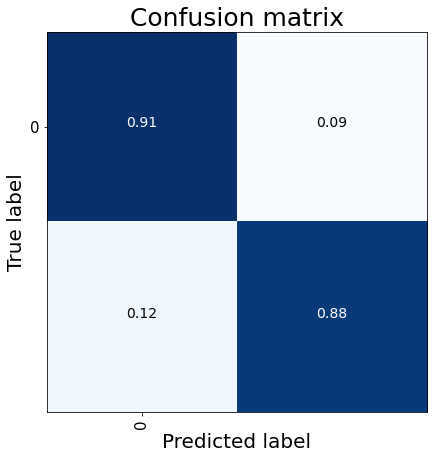

In [ ]:
cm = confusion_matrix(prob_pos,y_test)

plt.figure(figsize=(7,7))
plot_confusion_matrix(cm, classes=np.unique(np.where(y_test != 0)[1]), title="Confusion matrix")